## Impor Pustaka (Library Imports)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

## Memuat Dataset (Load Dataset)

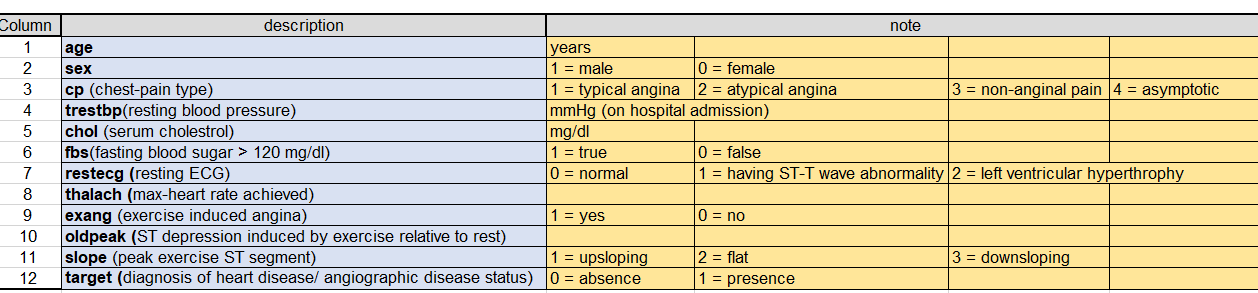

*   Tautan artikel: https://www.sciencedirect.com/science/article/pii/S2666521223000145
*   Tautan dataset: https://www.kaggle.com/datasets/durgesh2050/heart-disease-predication?select=heart_Disease_prediction_new_final.csv


Memuat dataset mentah dari file raw_heart_dataset.csv dan menampilkan lima baris pertama untuk mendapatkan gambaran umum tentang data.

In [2]:
# Membaca dataset dari file CSV
df = pd.read_csv('raw_heart_dataset.csv')

# Menampilkan 5 baris pertama
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0.0,0.0,1,0
1,49,0,3,160,180,0,0,156,0.0,1.0,2,1
2,37,1,2,130,283,0,1,98,0.0,0.0,1,0
3,48,0,4,138,214,0,0,108,1.0,1.5,2,1
4,54,1,3,150,195,0,0,122,0.0,0.0,1,0


## Eksplorasi Data Awal (Initial Data Exploration)

Tahap ini bertujuan untuk memahami struktur, tipe data, statistik deskriptif, dan korelasi antar fitur dalam dataset.

In [3]:
# Menampilkan informasi ringkas tentang DataFrame, termasuk tipe data dan nilai non-null
print("Informasi DataFrame:")
df.info()

print("\n" + "="*50 + "\n")

# Menampilkan statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif:")
df.describe()

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3235 non-null   int64  
 1   sex       3235 non-null   int64  
 2   cp        3235 non-null   int64  
 3   trestbps  3235 non-null   int64  
 4   chol      3235 non-null   int64  
 5   fbs       3235 non-null   int64  
 6   restecg   3235 non-null   int64  
 7   thalach   3235 non-null   int64  
 8   exang     3187 non-null   float64
 9   oldpeak   3235 non-null   float64
 10  slope     3235 non-null   int64  
 11  target    3235 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 303.4 KB


Statistik Deskriptif:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3187.000000,3235.000000,3235.000000,3235.000000
mean,54.201546,0.725193,2.625657,132.029366,229.636167,0.172488,0.662751,144.449459,0.382178,1.708532,1.859660,0.528284
std,9.162529,0.446486,1.259678,18.087212,81.428083,0.377863,0.778313,24.850577,0.485996,3.979574,0.713481,0.499277
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,204.000000,0.000000,0.000000,126.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,236.000000,0.000000,0.000000,147.000000,0.000000,0.900000,2.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,274.000000,0.000000,1.000000,163.000000,1.000000,1.900000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,62.000000,3.000000,1.000000


In [4]:
# Menampilkan jumlah nilai unik untuk setiap kolom
print("Jumlah Nilai Unik per Kolom:")
df.nunique()

Jumlah Nilai Unik per Kolom:


age          50
sex           2
cp            5
trestbps     67
chol        222
fbs           2
restecg       3
thalach     119
exang         2
oldpeak      81
slope         4
target        2
dtype: int64

Heatmap korelasi membantu kita melihat hubungan linear antar variabel numerik. Nilai mendekati 1 atau -1 menunjukkan korelasi yang kuat.

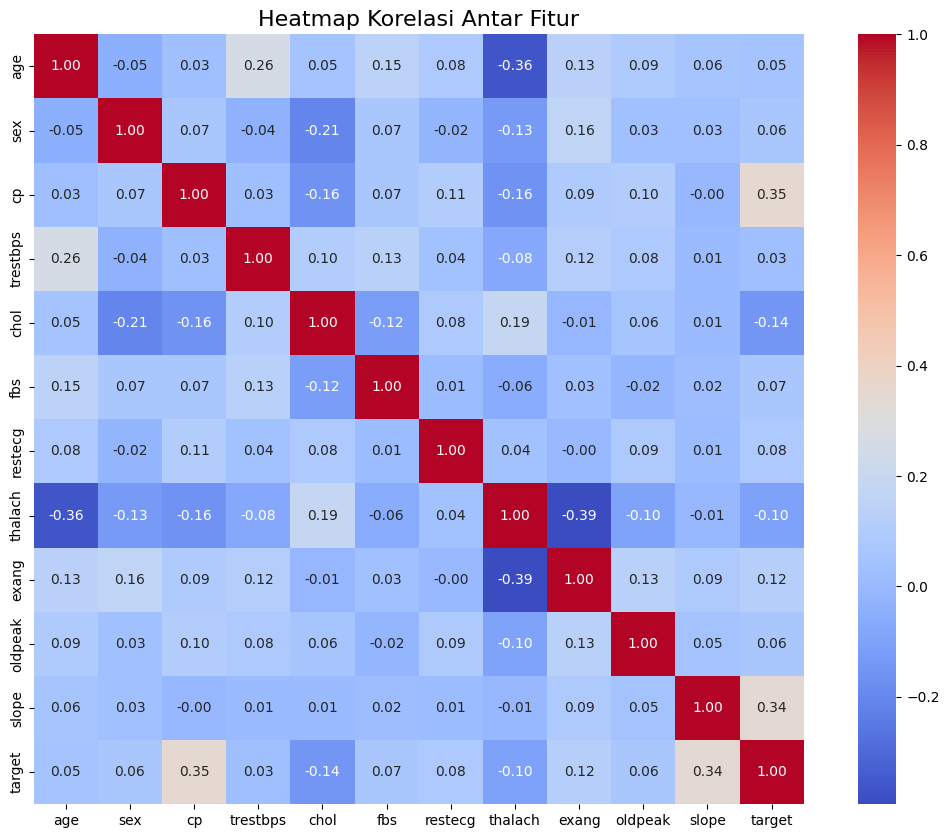

In [5]:
# Visualisasi korelasi antar fitur menggunakan heatmap
plt.figure(figsize=(14, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16)
plt.show()

## Penanganan Data Hilang (Handling Missing Data)

Pada tahap ini, kita akan mengidentifikasi dan menangani nilai yang hilang (missing values). Berdasarkan eksplorasi, diketahui bahwa:
1. Kolom exang memiliki nilai NaN.
2. Kolom cp dan slope memiliki nilai 0 yang tidak sesuai konteks dan dianggap sebagai missing value.

Kita akan menangani semua ini dengan metode modus (nilai yang paling sering muncul).

Jumlah Missing Value Awal:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang       48
oldpeak      0
slope        0
target       0
dtype: int64


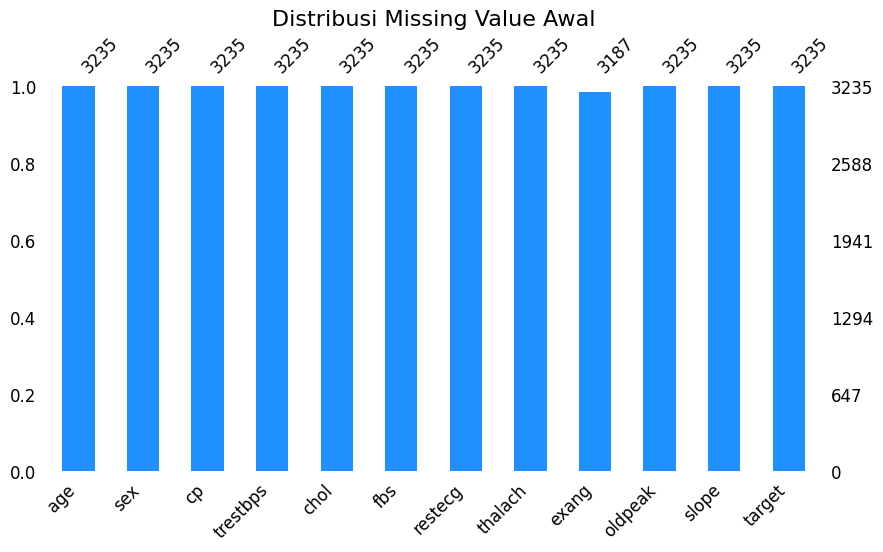

In [6]:
# Menampilkan jumlah missing value awal per kolom
print("Jumlah Missing Value Awal:")
print(df.isnull().sum())

# Visualisasi missing value dengan bar chart
msno.bar(df, color='dodgerblue', figsize=(10,5), fontsize=12)
plt.title('Distribusi Missing Value Awal', fontsize=16)
plt.show()

In [7]:
# --- Proses Pembersihan Missing Values ---

# Mengganti nilai 0 yang tidak valid di 'cp' dan 'slope' dengan modus
df['cp'] = df['cp'].replace(0, df['cp'].mode()[0])
df['slope'] = df['slope'].replace(0, df['slope'].mode()[0])

# Mengisi nilai NaN di 'exang' dengan modus
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])

# --- Verifikasi Hasil Pembersihan ---
print("\nJumlah Missing Value Setelah Ditangani:")
print(df.isnull().sum())


Jumlah Missing Value Setelah Ditangani:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64


## Penanganan Outlier (Handling Outliers)

Outlier adalah titik data yang berbeda secara signifikan dari pengamatan lain. Di sini, kita akan mengidentifikasi outlier menggunakan visualisasi boxplot dan menanganinya dengan metode capping (membatasi nilai ke batas atas/bawah yang wajar berdasarkan IQR).

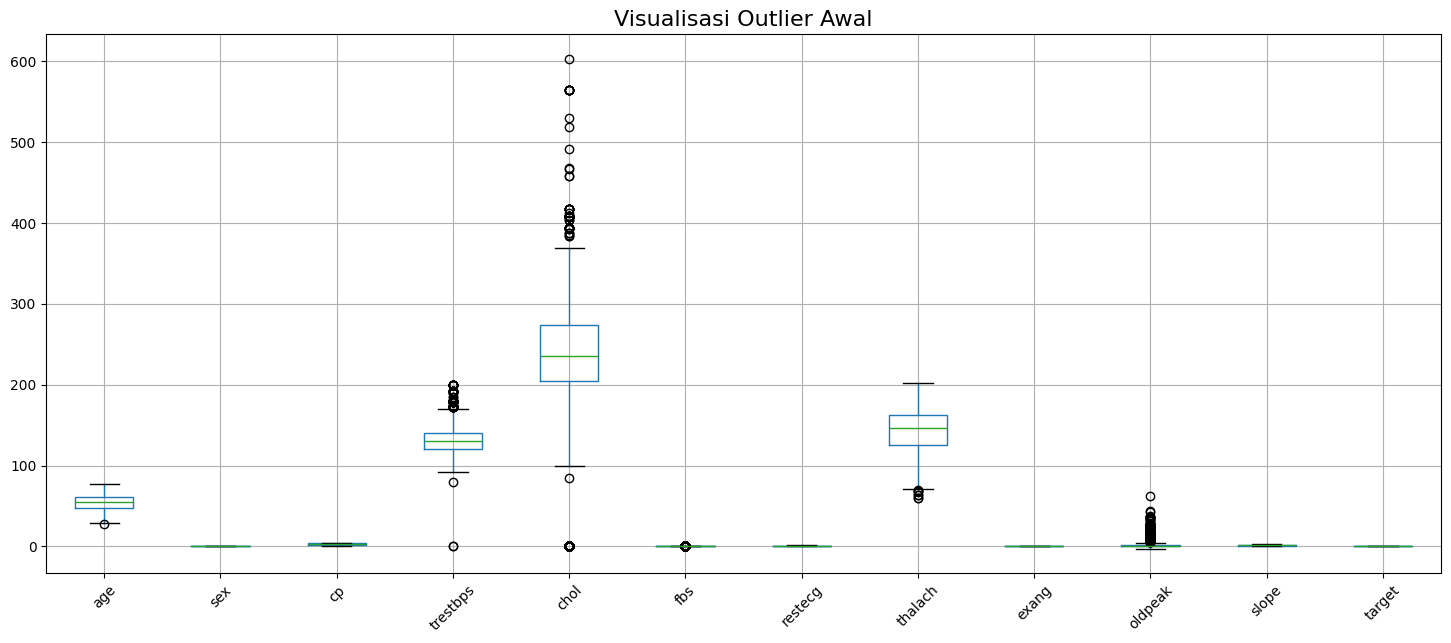

In [8]:
# Visualisasi outlier awal dengan boxplot
plt.figure(figsize=(18, 7))
df.boxplot()
plt.title('Visualisasi Outlier Awal', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [9]:
# Mengatasi outlier pada kolom numerik dengan metode Capping (IQR)
columns_to_cap = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for column in columns_to_cap:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[column] = np.where(
        df[column] > upper_limit, upper_limit,
        np.where(df[column] < lower_limit, lower_limit, df[column])
    )

print("Proses capping untuk outlier telah selesai.")

Proses capping untuk outlier telah selesai.


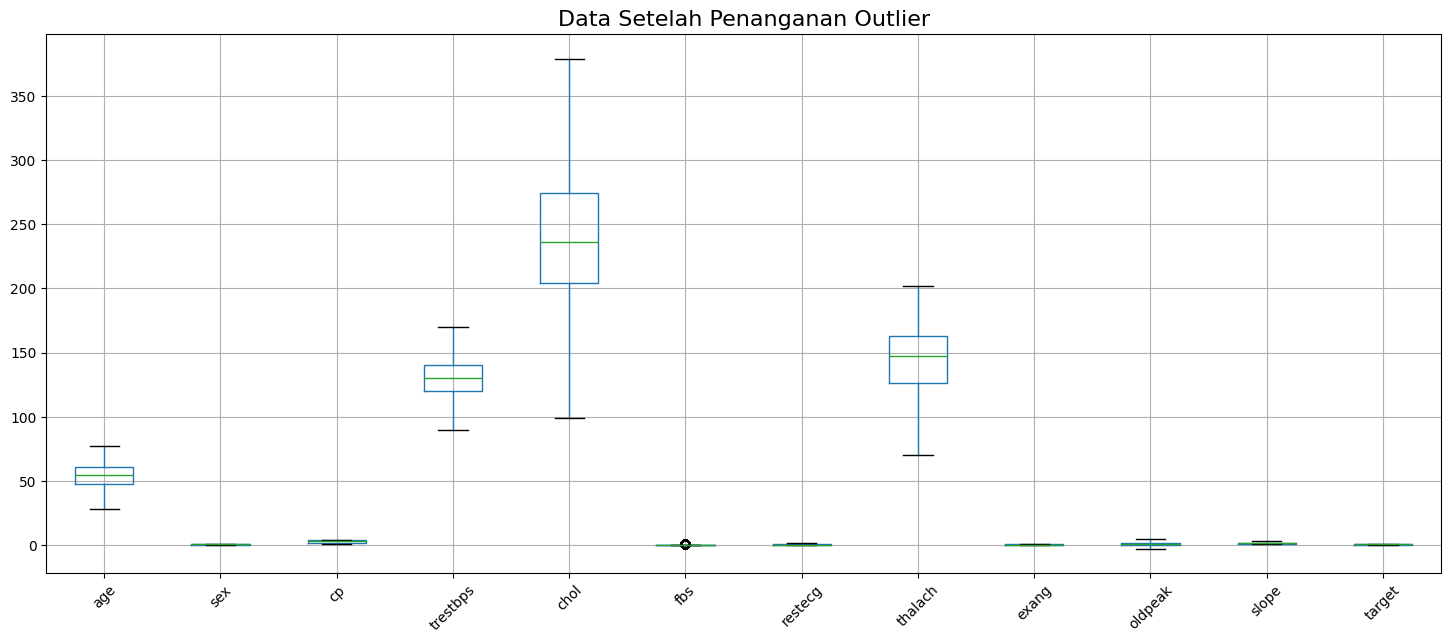

In [10]:
# Visualisasi data setelah penanganan outlier
plt.figure(figsize=(18, 7))
df.boxplot()
plt.title('Data Setelah Penanganan Outlier', fontsize=16)
plt.xticks(rotation=45)
plt.show()

## Finalisasi dan Penyimpanan Data (Finalization and Saving Data)

Sebagai langkah terakhir, kita akan menyesuaikan tipe data pada beberapa kolom agar sesuai dan menyimpan DataFrame yang sudah bersih ke dalam file CSV baru.

In [11]:
# Mengubah tipe data kolom 'fbs' dan 'exang' dari float ke integer
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)

# Menampilkan informasi DataFrame setelah semua proses pembersihan
print("Informasi DataFrame Final:")
df.info()

# Menampilkan 5 baris pertama dari data yang sudah bersih
df.head()

Informasi DataFrame Final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3235 non-null   float64
 1   sex       3235 non-null   int64  
 2   cp        3235 non-null   int64  
 3   trestbps  3235 non-null   float64
 4   chol      3235 non-null   float64
 5   fbs       3235 non-null   int64  
 6   restecg   3235 non-null   int64  
 7   thalach   3235 non-null   float64
 8   exang     3235 non-null   int64  
 9   oldpeak   3235 non-null   float64
 10  slope     3235 non-null   int64  
 11  target    3235 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 303.4 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40.0,1,2,140.0,289.0,0,0,172.0,0,0.0,1,0
1,49.0,0,3,160.0,180.0,0,0,156.0,0,1.0,2,1
2,37.0,1,2,130.0,283.0,0,1,98.0,0,0.0,1,0
3,48.0,0,4,138.0,214.0,0,0,108.0,1,1.5,2,1
4,54.0,1,3,150.0,195.0,0,0,122.0,0,0.0,1,0


In [12]:
# Menyimpan DataFrame yang sudah bersih ke file CSV baru
df.to_csv('cleaned_heart_dataset.csv', index=False)

print("\nData yang sudah bersih berhasil disimpan ke 'cleaned_heart_dataset.csv'")


Data yang sudah bersih berhasil disimpan ke 'cleaned_heart_dataset.csv'
